In [265]:
!pip install googletrans
!pip install tqdm --upgrade
!pip install twython

Requirement already up-to-date: tqdm in /usr/local/lib/python3.6/dist-packages (4.45.0)


In [0]:
# web scraping
import requests
from bs4 import BeautifulSoup
from time import time, sleep
from random import randint

# Translation
from googletrans import Translator

# Utilities
from tqdm import tqdm
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd

# NLP
from nltk import sent_tokenize, word_tokenize, pos_tag, RegexpParser
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import mark_negation

In [267]:
# Download resources
import nltk

nltk.download("punkt")
nltk.download("vader_lexicon")
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

Web Scrap

โรงพยาบาลกรุงเทพคริสเตียน

In [0]:
def honestdoc_comment(url, hospitalName):
    """
    This function is to scrap data from a webboard (https://www.honestdocs.com).

    INPUT
    url : String
      URL of the target website
    
    OUTPUT
    comment : List
      List of comments
    score : List
      List of rating score
    """
    #create connection
    data = requests.get(url)
    print("requests code : {}".format(data.status_code)) 
    print("note\n2xx: success\n4xx, 5xx: error")
    
    #scrape comment and score
    start_time = time() #start scraping data from page1
    r = requests.get(url, params=dict(query="web scraping",page=1)) 
    soup = BeautifulSoup(r.text,"html.parser")
    n = len(soup.find_all("div",{"class":"comments__content"})) #find n of items in the page
    
    #extract each item
    comment = [soup.find_all("div",
                             {"class":"comments__content"})[i].get_text().strip() for i in range(0,n)]
    score = [soup.find_all("span",
                           {"class":"stars star-rating"})[i].attrs["data-score"] for i in range(0,n)]
    elapsed_time = time() - start_time #finish scraping data from page1
    print("Time used for scraping data from page - 1 : {} s".format(elapsed_time))
    sleep(randint(1,3)) #mimic human behavior
           
    p = 2 #start scraping data from page2
    while n > 0: #until the number of items in a page = 0
        start_time = time() 
        r = requests.get(url, params=dict(query="web scraping",page=p))
        soup = BeautifulSoup(r.text,"html.parser")
        n = len(soup.find_all("div",{"class":"comments__content"}))
        [comment.append(soup.find_all("div",
                                      {"class":"comments__content"})[i].get_text().strip()) for i in range(0,n)]
        [score.append(soup.find_all("span",
                                    {"class":"stars star-rating"})[i].attrs["data-score"]) for i in range(0,n)]
        elapsed_time = time() - start_time
        print("Time used for scraping data from page - {} : {} s".format(p, elapsed_time))
        p +=1
        sleep(randint(1,3))

    df = pd.DataFrame({"comment": comment, 
              "score": score
              })
    
    df["hospital"] = hospitalName
    
    return df

คำสั่งแปลงจากภาษาไทยเป็นภาษาอังกฤษ

In [0]:
def th2en(comment):
  try:
    textTrans = Translator().translate(comment, src="th", dest="en").text
  except:
    textTrans = ""
    print("\n Can not translate " + comment)

  return textTrans

ดึง comment โรงพยาบาลกรุงเทพคริสเตียน



In [270]:
df = honestdoc_comment(r"https://www.honestdocs.co/hospitals/bangkok-christian-hospital", "bangkok-christian-hospital")
comments = df

requests code : 200
note
2xx: success
4xx, 5xx: error
Time used for scraping data from page - 1 : 1.242136001586914 s
Time used for scraping data from page - 2 : 1.4689140319824219 s
Time used for scraping data from page - 3 : 1.2458109855651855 s
Time used for scraping data from page - 4 : 1.2619600296020508 s
Time used for scraping data from page - 5 : 1.2475183010101318 s
Time used for scraping data from page - 6 : 1.247506856918335 s
Time used for scraping data from page - 7 : 1.2412643432617188 s
Time used for scraping data from page - 8 : 1.3625831604003906 s
Time used for scraping data from page - 9 : 1.2343556880950928 s
Time used for scraping data from page - 10 : 1.2309379577636719 s
Time used for scraping data from page - 11 : 1.233698844909668 s
Time used for scraping data from page - 12 : 1.2576844692230225 s
Time used for scraping data from page - 13 : 1.2484424114227295 s
Time used for scraping data from page - 14 : 1.267143964767456 s
Time used for scraping data from pa

นำคอมเม้นท์มาแปลงเป็นภาษาอังกฤษ

In [271]:
tqdm.pandas()
comments["en"] = comments.progress_apply(lambda x: th2en(x["comment"]), axis=1)

comments = df

100%|██████████| 80/80 [00:10<00:00,  7.84it/s]


ได้ทั้งหมด 80 แถว 4 column

In [272]:
comments.shape

(80, 4)

นับจำนวนคอมเม้นท์ได้ทั้งหมด 80 คอมเม้น

In [273]:
comments["hospital"].value_counts()

bangkok-christian-hospital    80
Name: hospital, dtype: int64

ตรวจสอบ 5 แถวแรกของข้อมูล

In [274]:
comments.head(10)

,comment,score,hospital,en
0,สิ่งที่ชอบอย่างหนึ่งมากจริงๆคือบุคลากรในโรงพยา...,5,bangkok-christian-hospital,What is really like a lot of people in this ho...
1,ได้เข้าไปใช้บริกาที่นี่ มีความสะอาดและต้อนรับด...,5,bangkok-christian-hospital,Riga has to use here. Clean and good reception...
2,สิ่งที่ชอบอย่างหนึ่งมากจริงๆคือบุคลากรในโรงพยา...,4,bangkok-christian-hospital,What is really like a lot of people in this ho...
3,พยาบาล คุณหมอพูดจา ดูแลดีค่ะ โรงพยาบาลมีที่จอด...,5,bangkok-christian-hospital,Hospital doctors speak good care hospital park...
4,ไปหาคุณหมอด้วยอาการปวดขาคุณหมอถามนิดหน่อยแล้วก...,3,bangkok-christian-hospital,You go to the doctor with symptoms of leg pain...
5,เป็นโรงพยาบาลที่ทุกคนในครอบครัวใช้บริการ เพราะ...,4,bangkok-christian-hospital,The hospital where the family service. Because...
6,ป่วยตกบัยฝนไดค่ะเข้ารักษาห้องฉุกเฉินมีประกันสุ...,4,bangkok-christian-hospital,Buffett's rain falls ill treat me into the eme...
7,เป็นคนไข้ประจำมาตลอด 20 กว่าปี ล่าสุดได้ไปหาหม...,2,bangkok-christian-hospital,Patients are routinely over the last 20 years ...
8,ไปรับการรักษาโรครูมาตอยด์ที่โรงพยาบาลกรุงเทพคร...,5,bangkok-christian-hospital,To treat rheumatoid at the Bangkok Christian H...
9,บริการดี อธิบายละเอียด ใส่ใจคนไข้,5,bangkok-christian-hospital,Good service described patient care


Mount Drive เพื่อAuthorize เข้าถึง Folder ในDrive

In [275]:
from google.colab import drive
drive.mount('/content/gdrive')

import os
os.chdir('/content/gdrive/My Drive/DS532_Text_Analytic/Project_Hospital')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Save ข้อมูลเป็น csv

In [0]:
#backup data 
comments.to_csv("comment_bangkok-christian-hospital.csv", index=False)

In [0]:
from tqdm import tqdm_notebook

**Read data**

In [0]:
rama = pd.read_csv("comment_bangkok-christian-hospital.csv")
rama = rama.reset_index()
rama = rama.rename(columns={"index": "cid"})

Sentence Tokenize

In [279]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
from nltk import sent_tokenize

sentences = []
cids = []
for cid in rama["cid"]:
    s = sent_tokenize(rama.loc[cid, "en"])
    sentences = sentences + s
    cids = cids + [cid] * len(s)

**Sentence-level sentiment**

In [281]:
!pip install twython

In [0]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [0]:
def predict_sentiment(sentence):
  sa = SentimentIntensityAnalyzer()
  sentiment_distribution = sa.polarity_scores(sentence)
  score = sentiment_distribution.get("compound")
  
  if score >= 0.05:
    return "positive"
  elif score <= -0.05:
    return "negative"
  else:
    return "neutral"

In [284]:
import nltk
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [285]:
sentiments = []
for sentence in tqdm_notebook(sentences, total=len(sentences)):
    sentiments.append(predict_sentiment(sentence))

Parsing

In [286]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [0]:
from nltk import word_tokenize, pos_tag, RegexpParser

In [0]:
grammar = """NP: {<NN|NNS>+}
                 {<NN|NNS>+<CC><NN|NNS>+}"""
chunker = RegexpParser(grammar)
parse_trees = []
for sentence in sentences:
    parse_trees.append(chunker.parse(pos_tag(word_tokenize(sentence))))

In [289]:
parse_trees

[Tree('S', [('What', 'WP'), ('is', 'VBZ'), ('really', 'RB'), ('like', 'IN'), ('a', 'DT'), Tree('NP', [('lot', 'NN')]), ('of', 'IN'), Tree('NP', [('people', 'NNS')]), ('in', 'IN'), ('this', 'DT'), Tree('NP', [('hospital', 'NN')]), ('.', '.')]),
 Tree('S', [('Most', 'JJS'), ('smiling', 'JJ'), Tree('NP', [('Greetings', 'NNS'), ('care', 'NN'), ('patients', 'NNS')]), ('and', 'CC'), ('those', 'DT'), ('who', 'WP'), ('use', 'VBP'), ('the', 'DT'), Tree('NP', [('service', 'NN')]), ('were', 'VBD'), ('very', 'RB'), ('good', 'JJ'), ('.', '.')]),
 Tree('S', [Tree('NP', [('Talk', 'NN'), ('relax', 'NN')]), ('at', 'IN'), ('all', 'DT'), ('.', '.')]),
 Tree('S', [('Most', 'JJS'), ('of', 'IN'), ('the', 'DT'), Tree('NP', [('doctors', 'NNS')]), ('I', 'PRP'), ('had', 'VBD'), ('the', 'DT'), ('good-hearted', 'JJ'), Tree('NP', [('people', 'NNS')]), ('I', 'PRP'), ('have', 'VBP'), ('ever', 'RB'), ('come', 'VBN'), ('across', 'IN'), Tree('NP', [('someone', 'NN')]), ('who', 'WP'), ("'s", 'VBZ'), ('not', 'RB'), ('ver

Extract Noun Phrase

In [0]:
def extract_np(parsed_tree):
    nps = []
    for subtree in parsed_tree.subtrees():
        if subtree.label() == 'NP':
            t = subtree
            t = " ".join(word for word, tag in t.leaves())
            nps.append(t)
    return nps

In [0]:
nps = []
for parse_tree in parse_trees:
    nps.append(extract_np(parse_tree))

In [292]:
nps

[['lot', 'people', 'hospital'],
 ['Greetings care patients', 'service'],
 ['Talk relax'],
 ['doctors', 'people', 'someone'],
 ['rooms', 'price'],
 [],
 ['reception', 'service', 'system'],
 ['nurse', 'doctor', 'facilities', 'hospital'],
 ['Doctors', 'hospital', 'thing', 'service'],
 ['service'],
 ['doctor', 'patient feels', 'thank'],
 ['lot', 'people', 'hospital'],
 ['Greetings care patients', 'service'],
 ['Talk relax'],
 ['doctors', 'people', 'someone'],
 ['rooms', 'price', 'midwife', 'nursing care'],
 ['price', 'treatment', 'bit'],
 [],
 [],
 ['Hospital doctors', 'care hospital parking lot', 'buildings', 'prices'],
 ['service', 'return service'],
 ['queues', 'mall adjacent', 'hospital'],
 ['time', 'test results', 'something', 'results'],
 ['eloquence', 'treatment', 'childhood'],
 ['hospital'],
 ['doctor', 'symptoms', 'leg pain', 'doctor', 'medication', 'line'],
 ['hospital', 'family service'],
 ['price', 'home care', 'ease', 'travel'],
 ['rain', 'emergency room', 'health insurance cl

**Put information into DataFrame**

In [0]:
df = pd.DataFrame({"cids": cids, 
                   "sentences": sentences, 
                   "sentiments": sentiments, 
                   "NP": nps})

In [294]:
df.head(10)

,cids,sentences,sentiments,NP
0,0,What is really like a lot of people in this ho...,positive,"[lot, people, hospital]"
1,0,Most smiling Greetings care patients and those...,positive,"[Greetings care patients, service]"
2,0,Talk relax at all.,positive,[Talk relax]
3,0,Most of the doctors I had the good-hearted peo...,neutral,"[doctors, people, someone]"
4,0,The Department of Medicine Private rooms are O...,positive,"[rooms, price]"
5,1,Riga has to use here.,neutral,[]
6,1,Clean and good reception The service was with ...,positive,"[reception, service, system]"
7,1,A nurse and doctor There are facilities within...,neutral,"[nurse, doctor, facilities, hospital]"
8,1,Doctors are competent The hospital is a good t...,positive,"[Doctors, hospital, thing, service]"
9,1,I would recommend to use the service if they a...,negative,[service]


In [0]:
df['sentences'] = df['sentences'].str.replace("[^a-zA-Z#]", " ")

In [0]:
df['sentiments'] = df['sentiments'].str.replace("[^a-zA-Z#]", " ")

Split dataframe into positive and negative sentiment

In [0]:
pos = df[df["sentiments"] == "positive"].reset_index(drop=True)
pos_words = sum(pos["NP"].tolist(), [])
pos_words = [word.lower() for word in pos_words]
poshist = pd.DataFrame({"words": pos_words})
poshist = poshist.groupby("words").size().reset_index(name="#pos")

In [0]:
neg = df[df["sentiments"] == "negative"].reset_index(drop=True)
neg_words = sum(neg["NP"].tolist(), [])
neg_words = [word.lower() for word in neg_words]
neghist = pd.DataFrame({"words": neg_words})
neghist = neghist.groupby("words").size().reset_index(name="#neg")

**Word Cloud Representation**

In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [0]:
def vizwordcloud(df):
    tuples = [tuple(x) for x in df.values]
    wordcloud = WordCloud().generate_from_frequencies(dict(tuples))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

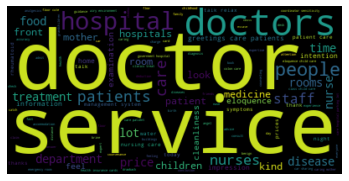

In [301]:
vizwordcloud(poshist)

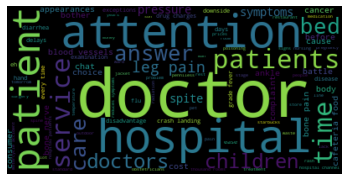

In [302]:
vizwordcloud(neghist)

We saw 2 problems: 1) Singular and plural words were not combined and 2) words that should not be appeared in the wordcloud such as patients because of the co-reference resolution problem.

Let's transfrom selected words to their singular form because at this stage the number of words is not much already then add categories to filter out.

In [0]:
def plural2singular(word):
  if word == "doctors":
    return "doctor"
  elif word == "nurses":
    return "nurse"
  elif word == "clinics":
    return "clinic"
  elif word == "hospitals":
    return "hospital"
  elif word == "services":
    return "service"
  elif word == "staffs":
    return "staff"
  elif word == "treatments":
    return "treatment"
  elif word == "students":
    return "student"
  else:
    return word

In [0]:
pos_words = [plural2singular(word) for word in pos_words]
poshist = pd.DataFrame({"words": pos_words})
poshist = poshist.groupby("words").size().reset_index(name="#pos")

neg_words = [plural2singular(word) for word in neg_words]
neghist = pd.DataFrame({"words": neg_words})
neghist = neghist.groupby("words").size().reset_index(name="#neg")

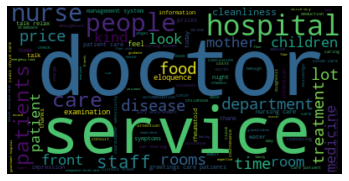

In [305]:
vizwordcloud(poshist)

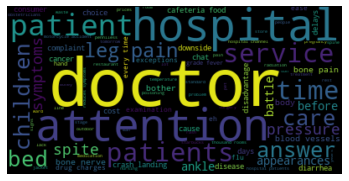

In [306]:
vizwordcloud(neghist)

In [0]:
def groups(word):
    if word in ("doctor", "nurse", "student"):
        return "staff"
    elif word in ("hospital", "clinic", "equipment", "place"):
        return "infrastructure"
    elif word in ("service", "care", "treatment", "surgery", "disease", "medical care"):
        return "service"
    elif word in ("queue", "appointment"):
        return "process"
    elif word in ("price", "claim"):
        return "finance"
    else:
        return "others"

In [0]:
poshist["category"] = poshist["words"].apply(lambda x: groups(x))
poscount = poshist.groupby("category").size().reset_index(name="#")
poscount = poscount[poscount["category"] != "others"].reset_index(drop=True)

In [0]:
neghist["category"] = neghist["words"].apply(lambda x: groups(x))
negcount = neghist.groupby("category").size().reset_index(name="#")
negcount = negcount[negcount["category"] != "others"].reset_index(drop=True)

**Plot Radar Chart**

In [310]:
poscount

,category,#
0,finance,2
1,infrastructure,1
2,service,5
3,staff,2


In [311]:
negcount

,category,#
0,infrastructure,1
1,service,5
2,staff,1


In [0]:
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode,  plot

In [313]:
fig = px.line_polar(poscount, r="#", theta="category", line_close=True)
plot(fig)

'temp-plot.html'

In [314]:
fig_2 = px.line_polar(negcount, r="#", theta="category", line_close=True)
plot(fig_2)

'temp-plot.html'

Extracting Features from cleaned comments

In [0]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

In [316]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(df['sentences'])

df_bow = pd.DataFrame(bow.todense())

df_bow

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
311,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
312,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
313,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [317]:
#Term Frequency-Inverse Document Frequency (TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')

tfidf_matrix=tfidf.fit_transform(df['sentences'])

df_tfidf = pd.DataFrame(tfidf_matrix.todense())

df_tfidf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.316126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.402487,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.678839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.484593,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.335925,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.570952,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.532169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.545573,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


#Splitting our dataset into Training and Validation Set

In [318]:
train_bow = bow[:31962]
train_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [319]:
#Using features from TF-IDF for training set
train_tfidf_matrix = tfidf_matrix[:31962]

train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [320]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder ()
df['sentiments'] = number.fit_transform(df['sentiments'].astype('str'))
df

,cids,sentences,sentiments,NP
0,0,What is really like a lot of people in this ho...,2,"[lot, people, hospital]"
1,0,Most smiling Greetings care patients and those...,2,"[Greetings care patients, service]"
2,0,Talk relax at all,2,[Talk relax]
3,0,Most of the doctors I had the good hearted peo...,1,"[doctors, people, someone]"
4,0,The Department of Medicine Private rooms are O...,2,"[rooms, price]"
...,...,...,...,...
310,76,You make little treat,2,[treat]
311,77,Impressive fast enough,2,[]
312,78,If you find a common disease such as flu usual...,0,"[disease, flu, doctor, hospital channel]"
313,79,Good nursing care is a preliminary inquiry,2,"[nursing care, inquiry]"


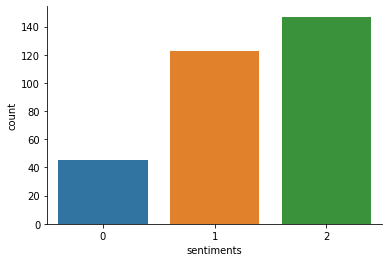

In [321]:
# Neutral label : 0 , Negative label : 1 , Positive  label : 2
import seaborn as sns
sns.countplot(df['sentiments'])
sns.despine()

In [0]:
#Splitting the data into training and validation set
from sklearn.model_selection import train_test_split

In [0]:
x_train_bow, x_valid_bow, y_train_bow, y_valid_bow = train_test_split(train_bow,df['sentiments'],test_size=0.3,random_state=0)

In [0]:
x_train_tfidf, x_valid_tfidf, y_train_tfidf, y_valid_tfidf = train_test_split(train_tfidf_matrix,df['sentiments'],test_size=0.3,random_state=0)

In [325]:
x_train_bow.shape

(220, 237)

In [326]:
x_valid_bow.shape

(95, 237)

In [327]:
y_train_bow.shape

(220,)

In [328]:
y_valid_bow.shape

(95,)

#Applying Machine Learning Models

In [0]:
from sklearn.metrics import f1_score

In [0]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR = LR.fit(x_train_bow,y_train_bow)

In [331]:
prediction_bow = LR.predict_proba(x_valid_bow)
prediction_bow

array([[0.06476952, 0.04478725, 0.89044323],
       [0.0688247 , 0.6114077 , 0.3197676 ],
       [0.07741902, 0.65965246, 0.26292851],
       [0.06285499, 0.7248907 , 0.21225431],
       [0.11313012, 0.34475001, 0.54211987],
       [0.11315154, 0.59554496, 0.2913035 ],
       [0.4736922 , 0.11873475, 0.40757304],
       [0.02949456, 0.19258661, 0.77791883],
       [0.14105645, 0.10005252, 0.75889103],
       [0.1326155 , 0.40589756, 0.46148694],
       [0.15981589, 0.27861653, 0.56156758],
       [0.53292881, 0.35255255, 0.11451865],
       [0.15292865, 0.64498628, 0.20208507],
       [0.11236727, 0.33592959, 0.55170315],
       [0.0708516 , 0.71063443, 0.21851397],
       [0.11531886, 0.63604669, 0.24863445],
       [0.07362187, 0.79042248, 0.13595566],
       [0.07014628, 0.75568909, 0.17416463],
       [0.05048472, 0.89388511, 0.05563017],
       [0.21448722, 0.61051497, 0.17499781],
       [0.39532545, 0.46101468, 0.14365987],
       [0.12011475, 0.41742097, 0.46246428],
       [0.

In [332]:
#Calculating the F1 score
# if prediction is equal to 2 else 1 where 2 is for positive comments and 1 for negative sentiment comments
prediction_int = prediction_bow[:,1]>=0.3

# converting the results to integer type
prediction_int = prediction_int.astype(np.int)
prediction_int

# calculating f1 score
log_bow = f1_score(y_valid_bow, prediction_int,average='micro')

log_bow

0.3157894736842105

In [333]:
LR.fit(x_train_tfidf,y_train_tfidf)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [334]:
prediction_tfidf = LR.predict_proba(x_valid_tfidf)

prediction_tfidf

array([[0.15795424, 0.26168902, 0.58035674],
       [0.1004615 , 0.47510799, 0.42443051],
       [0.11299884, 0.49708521, 0.38991596],
       [0.12213513, 0.56911635, 0.30874852],
       [0.13909105, 0.40237131, 0.45853763],
       [0.13588329, 0.4715015 , 0.39261521],
       [0.2917903 , 0.20890461, 0.49930509],
       [0.07731372, 0.28066458, 0.64202169],
       [0.20036562, 0.18148581, 0.61814858],
       [0.12058307, 0.37248348, 0.50693345],
       [0.14232076, 0.32603105, 0.53164818],
       [0.28911904, 0.4734963 , 0.23738467],
       [0.18229461, 0.52371124, 0.29399415],
       [0.13888684, 0.42264919, 0.43846396],
       [0.10978168, 0.53890821, 0.35131011],
       [0.1433703 , 0.51655213, 0.34007757],
       [0.1112435 , 0.64892307, 0.23983344],
       [0.12358472, 0.60476438, 0.2716509 ],
       [0.10966749, 0.69112039, 0.19921212],
       [0.19182472, 0.54363241, 0.26454287],
       [0.24115215, 0.47725788, 0.28158997],
       [0.15060173, 0.37093713, 0.47846113],
       [0.

In [335]:
prediction_int_tfidf = prediction_tfidf[:,1]>=0.3

prediction_int_tfidf = prediction_int.astype(np.int)
prediction_int_tfidf

# calculating f1 score
log_tfidf = f1_score(y_valid_tfidf, prediction_int_tfidf,average='micro')

log_tfidf

0.3157894736842105

In [336]:
#XGBoost
from xgboost import XGBClassifier
model_bow = XGBClassifier(random_state=0,learning_rate=0.9)
model_bow.fit(x_train_bow, y_train_bow)
xgb = model_bow.predict_proba(x_valid_bow)

xgb

array([[2.61838315e-03, 9.79261659e-03, 9.87589061e-01],
       [1.29186902e-02, 9.02924180e-01, 8.41571465e-02],
       [4.80738878e-02, 8.03489327e-01, 1.48436755e-01],
       [2.49560047e-02, 7.65258372e-01, 2.09785566e-01],
       [1.47378389e-02, 1.21445768e-01, 8.63816381e-01],
       [8.11155885e-02, 6.68425500e-01, 2.50458926e-01],
       [7.81121790e-01, 3.43009531e-02, 1.84577271e-01],
       [9.74369177e-04, 4.56950814e-02, 9.53330517e-01],
       [2.63031453e-01, 3.72933736e-03, 7.33239233e-01],
       [1.65743202e-01, 3.22494924e-01, 5.11761844e-01],
       [3.04958582e-01, 2.45619342e-01, 4.49422032e-01],
       [5.25468290e-01, 4.69311535e-01, 5.22015383e-03],
       [8.11155885e-02, 6.68425500e-01, 2.50458926e-01],
       [2.63828021e-02, 2.76656359e-01, 6.96960807e-01],
       [7.58188069e-02, 6.24777853e-01, 2.99403310e-01],
       [8.11155885e-02, 6.68425500e-01, 2.50458926e-01],
       [3.89174186e-02, 8.40918124e-01, 1.20164491e-01],
       [1.19722947e-01, 4.07841

In [337]:
xgb = xgb[:,1] >= 0.3

# converting the results to integer type
xgb_int=xgb.astype(np.int)

# calculating f1 score
xgb_bow=f1_score(y_valid_bow,xgb_int,average='micro')

xgb_bow

0.3157894736842105

In [338]:
model_tfidf = XGBClassifier(random_state=2,learning_rate=0.7)
model_tfidf.fit(x_train_tfidf, y_train_tfidf)
xgb_tfidf=model_tfidf.predict_proba(x_valid_tfidf)

xgb_tfidf

array([[2.81518195e-02, 7.34860748e-02, 8.98362100e-01],
       [6.33304240e-03, 9.36939657e-01, 5.67273311e-02],
       [6.73106536e-02, 7.56653905e-01, 1.76035464e-01],
       [1.08966731e-01, 2.27875188e-01, 6.63158119e-01],
       [4.46525291e-02, 2.80094326e-01, 6.75253153e-01],
       [1.01132452e-01, 6.34379029e-01, 2.64488518e-01],
       [3.01911950e-01, 3.22040826e-01, 3.76047254e-01],
       [1.10619003e-03, 1.11678354e-02, 9.87726033e-01],
       [6.58259094e-02, 4.78980243e-02, 8.86276007e-01],
       [1.70795873e-01, 3.82527053e-01, 4.46677089e-01],
       [8.24474812e-01, 5.66101559e-02, 1.18915074e-01],
       [2.62610525e-01, 7.31612206e-01, 5.77727985e-03],
       [1.01132452e-01, 6.34379029e-01, 2.64488518e-01],
       [2.94183642e-02, 8.10936987e-01, 1.59644634e-01],
       [1.01132452e-01, 6.34379029e-01, 2.64488518e-01],
       [1.01132452e-01, 6.34379029e-01, 2.64488518e-01],
       [6.52170926e-02, 7.64222682e-01, 1.70560241e-01],
       [9.04208422e-02, 7.27022

In [339]:
xgb_tfidf=xgb_tfidf[:,1]>=0.3

# converting the results to integer type
xgb_int_tfidf=xgb_tfidf.astype(np.int)

# calculating f1 score
score=f1_score(y_valid_tfidf,xgb_int_tfidf,average='micro')

score

0.3157894736842105

**To array** 

In [340]:
import networkx as nx
G = nx.Graph([(1,2)])
nx.incidence_matrix(G)


<2x1 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Column format>

In [341]:
nx.incidence_matrix(G).todense()

matrix([[1.],
        [1.]])

In [342]:
nx.incidence_matrix(G).todense().A

array([[1.],
       [1.]])

In [343]:
pip install pipelines


In [344]:
#support vector machine
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC
svm = SVC(gamma='auto')
model_svc = LinearSVC()
svm = CalibratedClassifierCV(model_svc) 
svm.fit(x_train_bow,y_train_bow)

CalibratedClassifierCV(base_estimator=LinearSVC(C=1.0, class_weight=None,
                                                dual=True, fit_intercept=True,
                                                intercept_scaling=1,
                                                loss='squared_hinge',
                                                max_iter=1000,
                                                multi_class='ovr', penalty='l2',
                                                random_state=None, tol=0.0001,
                                                verbose=0),
                       cv=None, method='sigmoid')

In [0]:
# แก้ปัญฆา predict_proba ไม่ได้ เนื่องจาก probability=False
import pickle
filename = 'linearSVC.sav'
pickle.dump(model, open(filename, 'wb'))

In [346]:
svm = pickle.load(open(filename, 'rb'))
svm_bow = svm.predict_proba(x_valid_bow)

svm_bow



array([[0.12176618, 0.05954643, 0.81868739],
       [0.09046632, 0.53282723, 0.37670646],
       [0.10574564, 0.53379444, 0.36045992],
       [0.09248576, 0.69328484, 0.21422941],
       [0.11498188, 0.37921507, 0.50580306],
       [0.13115745, 0.55963676, 0.30920579],
       [0.49107393, 0.13654026, 0.37238581],
       [0.03590201, 0.27870561, 0.68539238],
       [0.22211226, 0.07894409, 0.69894365],
       [0.20287946, 0.43773036, 0.35939018],
       [0.20825518, 0.33037988, 0.46136495],
       [0.34390631, 0.51199013, 0.14410355],
       [0.18862329, 0.55684049, 0.25453622],
       [0.10270195, 0.30561774, 0.59168031],
       [0.07648186, 0.66177866, 0.26173949],
       [0.14444688, 0.56930481, 0.28624831],
       [0.11572223, 0.68791066, 0.19636711],
       [0.07599256, 0.66040681, 0.26360063],
       [0.07419012, 0.78962945, 0.13618043],
       [0.25198052, 0.56479806, 0.18322142],
       [0.45986867, 0.37821606, 0.16191527],
       [0.1317552 , 0.390326  , 0.4779188 ],
       [0.

In [347]:


svm_bow=svm_bow[:,1]>=0.3
# converting the results to integer type
svm_int_bow=svm_bow.astype(np.int)
# calculating f1 score
svm_score_bow=f1_score(y_valid_bow,svm_int_bow,average='micro')

svm_score_bow

0.3684210526315789

In [348]:

svm.fit(x_train_tfidf,y_train_tfidf)
svm_tfidf = svm.predict_proba(x_valid_tfidf)

svm_tfidf

array([[0.15258255, 0.16988066, 0.67753678],
       [0.06675369, 0.4824024 , 0.45084391],
       [0.091846  , 0.41465722, 0.49349678],
       [0.10531967, 0.65215012, 0.24253021],
       [0.12923112, 0.37366459, 0.49710428],
       [0.10762634, 0.52005268, 0.37232098],
       [0.52283018, 0.06731734, 0.40985248],
       [0.03659956, 0.28690546, 0.67649498],
       [0.24210875, 0.07073183, 0.68715943],
       [0.12273402, 0.40601708, 0.4712489 ],
       [0.14031594, 0.26847645, 0.59120761],
       [0.36385946, 0.47216895, 0.16397159],
       [0.22974367, 0.54317076, 0.22708557],
       [0.09411072, 0.37059013, 0.53529915],
       [0.05376931, 0.61776279, 0.3284679 ],
       [0.12489201, 0.57799767, 0.29711032],
       [0.09013468, 0.74195002, 0.16791531],
       [0.07132355, 0.66733455, 0.2613419 ],
       [0.07211579, 0.78716561, 0.1407186 ],
       [0.22899062, 0.59910647, 0.17190291],
       [0.42207642, 0.41647926, 0.16144432],
       [0.14800317, 0.32074288, 0.53125395],
       [0.

In [349]:
svm_tfidf=svm_tfidf[:,1]>=0.3

# converting the results to integer type
svm_int_tfidf=svm_tfidf.astype(np.int)

# calculating f1 score
svm_score_tfidf=f1_score(y_valid_tfidf,svm_int_tfidf,average='micro')

svm_score_tfidf

0.3368421052631579

**Model Comparison**

In [350]:
# Bag-of-Words
Algo_1 = ['LogisticRegression(Bag-of-Words)','XGBoost(Bag-of-Words)','support vector machine(Bag-of-Words)']

score_1 = [log_bow,xgb_bow,svm_score_bow]

compare_1 = pd.DataFrame({'Model':Algo_1,'F1_Score':score_1},index=[i for i in range(1,4)])

compare_1.T

,1,2,3
Model,LogisticRegression(Bag-of-Words),XGBoost(Bag-of-Words),support vector machine(Bag-of-Words)
F1_Score,0.315789,0.315789,0.368421


In [351]:
# TF-IDF
Algo_2 = ['LogisticRegression(TF-IDF)','XGBoost(TF-IDF)','support vector machine(TF-IDF)']

score_2 = [log_tfidf,score,svm_score_tfidf]

compare_2 = pd.DataFrame({'Model':Algo_2,'F1_Score':score_2},index=[i for i in range(1,4)])

compare_2.T

,1,2,3
Model,LogisticRegression(TF-IDF),XGBoost(TF-IDF),support vector machine(TF-IDF)
F1_Score,0.315789,0.315789,0.336842


Evaluating the model

In [0]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [353]:
print (y_valid_bow)

65     2
314    1
150    2
158    0
108    2
      ..
209    0
89     1
206    1
27     2
166    0
Name: sentiments, Length: 95, dtype: int64


In [354]:
print (y_valid_tfidf)

65     2
314    1
150    2
158    0
108    2
      ..
209    0
89     1
206    1
27     2
166    0
Name: sentiments, Length: 95, dtype: int64


Comparison Graph

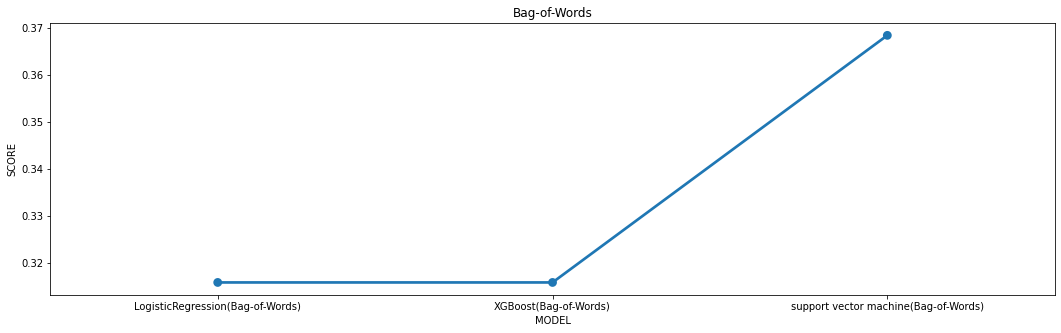

In [355]:
# Bag-of-Words
import seaborn as sns
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare_1)

plt.title('Bag-of-Words')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

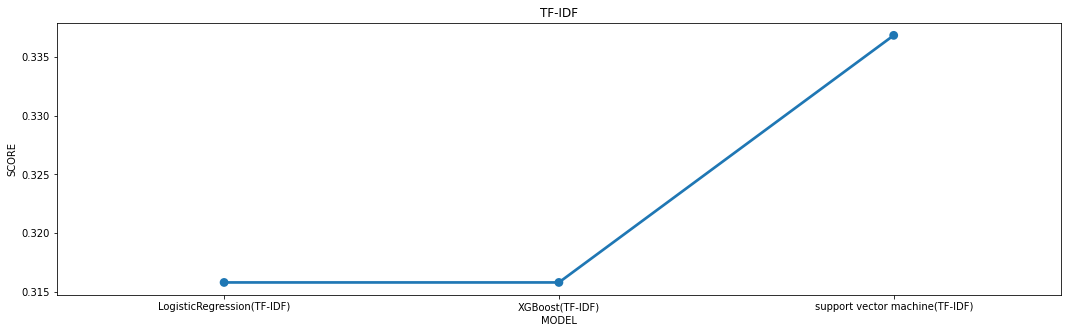

In [356]:
# TF-IDF
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare_2)

plt.title('TF-IDF')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

Playing around with auto-sklearn

In [357]:
!apt-get install swig -y
!pip install Cython numpy

# sometimes you have to run the next command twice on colab
# I haven't figured out why
!pip install auto-sklearn
# ignore some annoying warnings for demonstrating auto-sklearn 
# shouldn't be done in real production
import numpy as np
np.warnings.filterwarnings('ignore')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
swig is already the newest version (3.0.12-1).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


In [0]:
import autosklearn.classification
import sklearn.model_selection
import sklearn.datasets
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [0]:
#bag-of-words
x_train_bow, x_valid_bow, y_train_bow, y_valid_bow = sklearn.model_selection.train_test_split(df_bow,df['sentiments'],test_size=0.3,random_state=0)

In [0]:
#tfidf
x_train_tfidf, x_valid_tfidf, y_train_tfidf, y_valid_tfidf = sklearn.model_selection.train_test_split(df_tfidf,df['sentiments'],test_size=0.3,random_state=0)

In [0]:
import autosklearn.classification

# configure auto-sklearn
automl = autosklearn.classification.AutoSklearnClassifier(
          time_left_for_this_task=120, # run auto-sklearn for at most 2min
          per_run_time_limit=30, # spend at most 30 sec for each model training
          )

# train model(s)
automl.fit = (x_train_tfidf,y_train_tfidf)



In [362]:
# evaluate
y_hat = automl.predict(x_valid_tfidf)
test_acc = sklearn.metrics.accuracy_score(y_valid_tfidf, y_hat)
print("Accuracy score {0}".format(test_acc))
print("", sklearn.metrics.confusion_matrix(y_valid_tfidf, y_hat))
print("", sklearn.metrics.classification_report(y_valid_tfidf, y_hat))


TypeError: ignored